In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopy.distance

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Cleaned_data.csv", index_col=False)
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/Cleaned_data.csv'

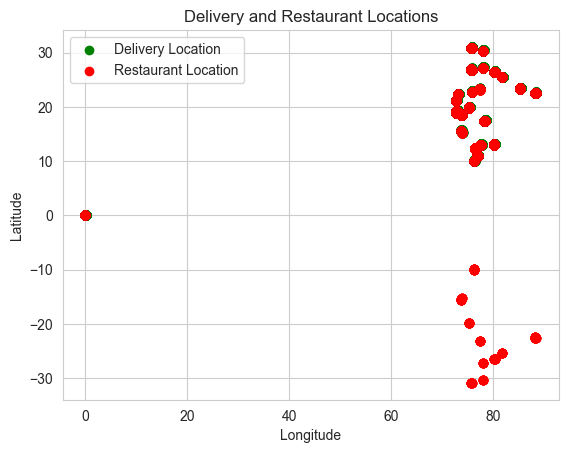

In [ ]:
fig, ax = plt.subplots()

# Plot the delivery locations in green
ax.scatter(df["Delivery_location_longitude"], df["Delivery_location_latitude"], 
           color='green', label='Delivery Location')

# Plot the restaurant locations in red
ax.scatter(df["Restaurant_longitude"], df["Restaurant_latitude"], 
           color='red', label='Restaurant Location')

# Add a title and labels
plt.title("Delivery and Restaurant Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the legend
plt.legend()

# Show the grid
plt.grid(True)
# Enable interactive mode
plt.ion()


# Show the plot
plt.show()

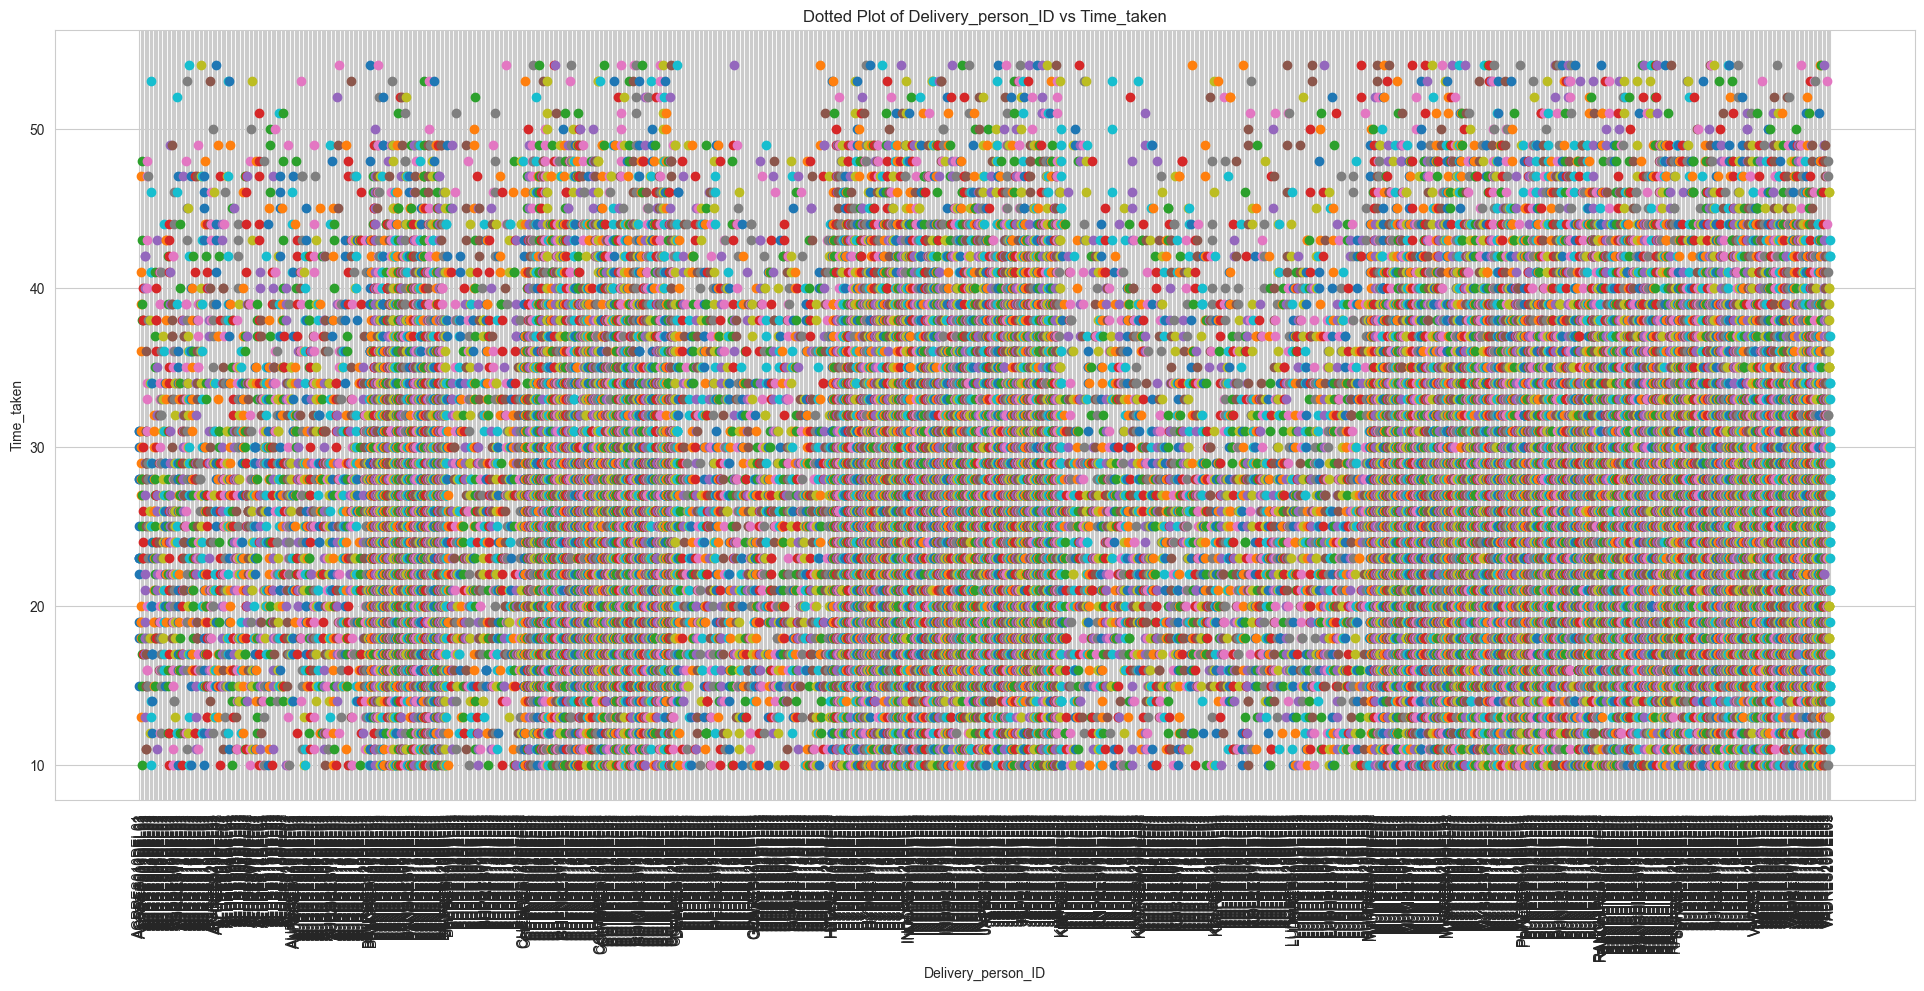

In [ ]:
##Plotting Delivery_person_ID Vs Time_taken(min)
plt.figure(figsize= (24,10))


for key, grp in df.groupby('Delivery_person_ID'):
    plt.scatter(grp['Delivery_person_ID'], grp['Time_taken(min)'], label=key)

plt.xlabel('Delivery_person_ID')  # Label for x-axis
plt.ylabel('Time_taken')  # Label for y-axis
plt.title('Dotted Plot of Delivery_person_ID vs Time_taken')  # Plot title
plt.xticks(rotation=90)
plt.grid(True)  # Optional: add a grid
plt.show()

#### I misunderstood that Delivery_person_ID is the ID attached to a particular Deliver person
#### but in the dfset it is related to the restaurant ID.
#### So our analysis should be focussed on the restauarant instead of Delivery person for this column
#### I am renaming the column "Delivery_person_ID" as "Restauarant_ID"

In [ ]:
df.rename({'Delivery_person_ID' : 'Restaurant_ID'}, axis =1, inplace = True)
df.head(4)

In [ ]:
df.Restaurant_ID.nunique()
## 1320 unique restaurants

In [ ]:
count_restaurants = df["Restaurant_ID"].value_counts()

In [ ]:
count_restaurants

In [ ]:
plt.figure(figsize=(30, 6))  # Optional: specify figure size

count_restaurants = df["Restaurant_ID"].value_counts()

count_restaurants.plot(kind='bar', color='skyblue')
plt.xlabel('Restaurant_ID')  # Label for x-axis
plt.ylabel('No of orders')  # Label for y-axis
plt.title('Scatter Plot of no of orders for Each Restaurant')  # Plot title
plt.xticks(rotation=90)
plt.legend(title='ID')  
plt.grid(True) 
plt.show()

### We see half of the restaurants have orders above 30 and remaining have less than 30

In [ ]:
def plot_rest_vs_avg_orders(df):
    plt.figure(figsize=(40, 6)) 

    for i, grp in df.groupby(["Restaurant_ID"]):
        plt.scatter(i, grp['Time_taken(min)'].mean(), color='skyblue', edgecolor='black', s=100)
    plt.xlabel('Restaurant_ID')  
    plt.ylabel('No of orders')  
    plt.title('Scatter Plot of no of orders for Each Restaurant') 
    plt.xticks(rotation=90)
    plt.grid(True) 
    plt.show()

filtered_ids = count_restaurants[count_restaurants > 30].index
high_serving_rest = df[df["Restaurant_ID"].isin(filtered_ids)]
plot_rest_vs_avg_orders(high_serving_rest)


In [ ]:

low_serving_rest = df[~df["Restaurant_ID"].isin(filtered_ids)]
plot_rest_vs_avg_orders(low_serving_rest)

In [ ]:
df.columns

### Delivery person Age Vs Time taken
### Sort the age values and plot the multiple time taken against 
### increasing age of DP


In [ ]:
sorted_df = df.sort_values(by = "Delivery_person_Age",ascending=True)

plt.figure(figsize= (16,8))
plt.scatter(sorted_df["Delivery_person_Age"], sorted_df["Time_taken(min)"])
plt.xlabel("Delivery person age")
plt.ylabel("Time Taken")
plt.title("Scatter plot of Delivery person age Vs Time taken to dliver food")
plt.show()

### I couldn't get a better understanding of how Age works against Time taken
### Looking at other ways to find any insights
### I have an intuition of if Delivery person age increases the chances of Time taken 
### for delivery should also increase.
### I am trying to capture that pattern
### Trying with the average time taken for the delivery for each age group of delivery person


In [ ]:
df["Delivery_person_Age"].hist(bins = 10, color = 'red', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dp_group = df.groupby('Delivery_person_Age')
plt.figure(figsize = (16,8))
for age , group in (dp_group):
    plt.scatter(age, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Delivery person age")
plt.ylabel("Time Taken")
plt.title("Scatter plot of Delivery person age Vs Time taken to dliver food")
plt.grid(True)
plt.show()

### There is a striking difference of 6min delivery time
### For DP of age above and below 30 can make the delivery time difference
### This is one of the features that determine the Time taken 
### But not the sole criteria in predicting the time taken

In [ ]:
df.sort_values(by =["Delivery_person_Ratings"], ascending=True)["Delivery_person_Ratings"]

#### For ratings i am expecting the DP has their utmost priority for their ratings
#### There are many factors involving the ratings
#### Fastest delivery, getting food safely, following the delivery instructions
#### Some customers care about their order reaching safely than reaching fast
#### Some customers give high ratings if there is a difficulty involved while delivering
#### There can be a complex pattern underlying for the ratings and time taken
#### But there should be decreasing relationship present 

In [ ]:
sorted_df = df.sort_values(by = "Delivery_person_Ratings",ascending=True)

plt.figure(figsize= (16,8))
plt.scatter(sorted_df["Delivery_person_Ratings"], sorted_df["Time_taken(min)"])
plt.xlabel("Delivery_person_Ratings")
plt.ylabel("Time Taken")
plt.title("Scatter plot of Delivery person Ratings Vs Time taken to dliver food")
plt.grid(True)
plt.show()

#### If we dissect the above plot into four quadrants
#### 1. Deliveries < 4* rating and time taken <30 mins -> there is no single order 
#####      there are 2 possibilities => Actually there are no orders or customers don't tend to give #####   higher ratings if the delivery time is greater than 30mins

####
####
#### 2. Deliveries < 4* rating and time taken >30 mins 
#####   Customers usually don't prefer late delivery unless there is a reason. So late deliverues=> less ratings

####
####
#### 3. Deliveries > 4* rating and time taken >30 mins 
#####   Customers give more than 4* rating even when delivery time >30mins if there is a difficulty or something careful needs to be carried or the delivery service is premium


####
####
## ("Golden Quadrant")
#### 4. Deliveries > 4* rating and time taken <30 mins 
#####   This is a golden quadrant we have to take a look into. We need to see how DP are capable of delivering in less time and able to get more than 4* ratings

In [ ]:
dp_group = df.groupby('Delivery_person_Ratings')
plt.figure(figsize = (16,8))
for age , group in (dp_group):
    plt.scatter(age, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Delivery person Ratings")
plt.ylabel("Time Taken")
plt.title("Scatter plot of Delivery person Ratings Vs Time taken to dliver food")
plt.grid(True)
plt.show()

#### There was a clear picture of less time taken to higher ratings
#### there is a decreasing relationship but in a step wise manner

# Calculate the distance feature  -> Haversine Formula
#### From 'Restaurant_latitude', 'Restaurant_longitude',
#### 'Delivery_location_latitude', 'Delivery_location_longitude'
#### There were few records where the latitude and longitude are having negative values indicating the south. 
#### I have applied absolute values for latitude and longitude


In [ ]:
def calculate_dist_res_del_locatio(x):
    res_lat_long = (abs(x['Restaurant_latitude']), abs(x['Restaurant_longitude']))
    del_lat_long = (abs(x['Delivery_location_latitude']), abs(x['Delivery_location_longitude']))

    return geopy.distance.geodesic(res_lat_long, del_lat_long).miles

df["distance_rest_del_loc"] = df.apply(lambda x : calculate_dist_res_del_locatio(x), axis =1)

#### Before moving to analyze the relations between Time taken and the distance
#### We meed to remove the time taken for the restaurant to prepare the food
#### In most of the cases restaurants takes too much time to make a single order due high demand in orders

In [ ]:
def calcualate_time_diff(x1, x2 ):
    return ((pd.to_datetime(x1) -
            pd.to_datetime(x2)).total_seconds())/60.0

df["Time_diff_res_picked"] = df.apply(lambda x : 
                                      calcualate_time_diff(x["Time_Order_picked"], x["Time_Orderd"]), axis = 1)
df['Time_diff_res_picked'] = df['Time_diff_res_picked'].apply(lambda x: x + 24 * 60 if x < 0 else x)


In [ ]:
## Plotting the relationship between distance and the actual time travelled
plt.figure(figsize = (18, 9))
plt.scatter(df['distance_rest_del_loc'], df["Time_taken(min)"])
plt.xlabel("Distance in miles")
plt.ylabel("Time taken for DP")
plt.title("Distance travelled by DP VS Time Taken for delivery")
plt.grid(True)
plt.show()

In [ ]:
dp_group = df.groupby('distance_rest_del_loc')
plt.figure(figsize = (16,8))
for distance , group in (dp_group):
    plt.scatter(distance, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Distnace in miles")
plt.xlabel("Average Time Taken")
plt.title("Scatter plot of Distance Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

### As we observe the trend in increase of Distance increase the time taken to deliver

In [ ]:
df["Time_Orderd"].iloc[10]

In [ ]:
df['date_column_str'] = df['date_column_ddmmyyy'].astype(str)

# Step 2: Convert the string column to datetime with proper format
df['date_column'] = pd.to_datetime(df['date_column_str'], format='%d%m%Y')
df['Time_Orderd_str'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S').dt.time

# Step 3: Extract the day, month, and year
df['hour'] = df['Time_Orderd_str'].apply(lambda x: x.hour)
df['day'] = df['date_column'].dt.day
df['month'] = df['date_column'].dt.month
df['year'] = df['date_column'].dt.year
df['weekday_name'] = df['date_column'].dt.day_name()

# Optional: Get the weekday as an integer (0=Monday, 6=Sunday)
df['weekday_int'] = df['date_column'].dt.weekday

### Distribution of number of orders against hourly, daily, weeekly, monthly

In [ ]:
hour_counts = df['hour'].value_counts()

# Step 5: Plot the distribution using seaborn or matplotlib
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='viridis')
plt.title('Distribution of Orders on hourly basis')
plt.xlabel('Hour')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
weekday_counts = df['weekday_name'].value_counts()

# Step 5: Plot the distribution using seaborn or matplotlib
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='viridis')
plt.title('Distribution of Weekday Counts')
plt.xlabel('Weekday')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

### This is quite surprising as I didn't expect wednesday to be top orders day
#### Let's go through the dissection of wednesday orders
#### During what time we have highest orders during only wednesday through out year

In [ ]:
wednesday_df = df[df["weekday_name"] == 'Wednesday']
wednesday_orders_count = wednesday_df["Time_Orderd"].value_counts()
plt.figure(figsize = (20, 10))
sns.barplot(x=wednesday_orders_count.index, y=wednesday_orders_count.values, palette='viridis')
plt.gca().set_xticks(plt.gca().get_xticks()[::4])
plt.title('Distribution of Weekday Counts')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
sunday_df = df[df["weekday_name"] == 'Sunday']
sunday_orders_count = sunday_df["Time_Orderd"].value_counts()
plt.figure(figsize = (20, 10))
sns.barplot(x=sunday_orders_count.index, y=sunday_orders_count.values, palette='viridis')
plt.gca().set_xticks(plt.gca().get_xticks()[::4])
plt.title('Distribution of Weekday Counts')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
day_orders_count = df["day"].value_counts()
plt.figure(figsize = (20, 10))
sns.barplot(x=day_orders_count.index, y=day_orders_count.values, palette='viridis')
plt.gca().set_xticks(plt.gca().get_xticks()[::4])
plt.title('Distribution of orders in month Datewise')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
month_orders_count = df["month"].value_counts()
plt.figure(figsize = (20, 10))
sns.barplot(x=month_orders_count.index, y=month_orders_count.values, palette='viridis')
plt.title('Distribution of orders monthly')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

####
#### We see there was a interesting element of having higher orders On wednesday
#### The usual trend of enormous amount of orders during the prime time of 17:00hrs to 23:00hrs
#### The dates of 10,20,30 are having higer orders which is a interesting topic to study
#### As we have only 3months of df we can't draw any insights from the monthly df


## Weather Conditions

In [ ]:
df["Weatherconditions"].unique()

In [ ]:
dp_group = df.groupby('Weatherconditions')
plt.figure(figsize = (16,8))
for weather , group in (dp_group):
    plt.scatter(weather, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Weatherconditions")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of Weatherconditions Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

### Cloudy and Foggy conditions affects the delivers times more
### Rainy and winter season are most affected

In [ ]:
dp_group = df.groupby('Road_traffic_density')
plt.figure(figsize = (16,8))
for traffic , group in (dp_group):
    plt.scatter(traffic, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Weatherconditions")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of Weatherconditions Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

In [ ]:
dp_group = df.groupby('Vehicle_condition')
plt.figure(figsize = (16,8))
for vehicle , group in (dp_group):
    plt.scatter(vehicle, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Vehicle_condition")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of Vehicle_condition Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

In [ ]:
df["Vehicle_condition"].hist(bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('vehicle Distribution')
plt.xlabel('Vehicle counts')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df["Vehicle_condition"].value_counts()

### It's high time to address the DP to repair or change their vehicles(with vehicle condition ) to repair or get a new vehicle 

In [ ]:
df["multiple_deliveries"].hist(bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Number of multiple deliveries')
plt.xlabel('Count of multiple deliveries')
plt.ylabel('Frequency')
plt.show()

#### Most of the deliveries are deliveries with joint deliveries
#### DP trying to deliver two items either from a single restaurant or
#### Trying to deliver two orders to 2 customers in a close range proximity

In [ ]:
dp_group = df.groupby('multiple_deliveries')
plt.figure(figsize = (16,8))
for mul_del , group in (dp_group):
    plt.scatter(mul_del, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("multiple_deliveries")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of multiple_deliveries Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

#### it is evident that increasing multiple oreders increase the time

In [ ]:
dp_group = df.groupby('Festival')
plt.figure(figsize = (16,8))
for Festival , group in (dp_group):
    plt.scatter(Festival, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("Festival")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of Festival Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Festival'], bins=10, color='skyblue', edgecolor='black')

# Add count numbers on the bars
for patch, count in zip(patches, n):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, int(count), ha='center', va='bottom')
plt.title('Number of Festival')
plt.xlabel('Count of Festival')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dp_group = df.groupby('Type_of_order')
plt.figure(figsize = (16,8))
for order_type , group in (dp_group):
    plt.scatter(order_type, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("order_type")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of order_type Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

In [ ]:
dp_group = df.groupby('Type_of_vehicle')
plt.figure(figsize = (16,8))
for vehicle_type , group in (dp_group):
    plt.scatter(vehicle_type, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("vehicle_type")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of vehicle_type Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

In [ ]:
dp_group = df.groupby('City')
plt.figure(figsize = (16,8))
for City , group in (dp_group):
    plt.scatter(City, group['Time_taken(min)'].mean(), color='skyblue', edgecolor='black')
plt.xlabel("City")
plt.ylabel("Average Time Taken")
plt.title("Scatter plot of City Vs Avg Time taken to dliver food")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['City'], bins=10, color='skyblue', edgecolor='black')

# Add count numbers on the bars
for patch, count in zip(patches, n):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, int(count), ha='center', va='bottom')
plt.title('Number of orders in City condition')
plt.xlabel('City condition')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df["Time_diff_res_picked"].unique()

# Target : time_taken(min)

In [ ]:
## Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Time_taken(min)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Time_taken')
plt.xlabel('Time_taken(min)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Time_taken(min)'], bins=10, kde=True, color='skyblue')  # kde=True adds a kernel density estimate
plt.title('Distribution of Time_taken(min)')
plt.xlabel('Time_taken')
plt.ylabel('Frequency')
plt.show()

In [ ]:
percentile_25 = df['Time_taken(min)'].quantile(0.25)
percentile_50 = df['Time_taken(min)'].quantile(0.50)  # Median
percentile_75 = df['Time_taken(min)'].quantile(0.75)
percentile_99 = df['Time_taken(min)'].quantile(0.99)

# Plot the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=df['Time_taken(min)'], color='skyblue')

# Add percentile annotations
plt.text(percentile_25, 0.02, f'25th: {percentile_25:.2f}', ha='center', va='bottom', color='black', fontsize=10, rotation=90)
plt.text(percentile_50, 0.02, f'50th: {percentile_50:.2f}', ha='center', va='bottom', color='black', fontsize=10, rotation=90)
plt.text(percentile_75, 0.02, f'75th: {percentile_75:.2f}', ha='center', va='bottom', color='black', fontsize=10, rotation=90)
plt.text(percentile_99, 0.02, f'99th: {percentile_99:.2f}', ha='center', va='bottom', color='red', fontsize=10, rotation=90)

# Customize plot
plt.title('Box Plot of Time_taken(min) with Percentiles')
plt.xlabel('Time_taken(min)')

# Show the plot
plt.show()

#### There are outlier after 50mins

In [ ]:
percentile_99 = df['Time_taken(min)'].quantile(0.99)
outliers = df[df['Time_taken(min)'] > percentile_99]
outliers['Time_taken(min)']

In [ ]:
df["Time_taken(min)"].quantile(0.99)

In [ ]:
outliers[["Time_taken(min)", "Delivery_person_Ratings"]].sort_values(by = "Delivery_person_Ratings", ascending = False)

In [ ]:
df[df["Delivery_person_Ratings"] < 3.6].shape, outliers[outliers["Delivery_person_Ratings"] >= 3.6].shape

In [ ]:
df.columns

In [ ]:
plt.figure(figsize = (4, 2))

sns.distplot(x = df[df['Time_taken(min)'] > df['Time_taken(min)'].quantile(0.99)]['Time_taken(min)'], hist_kws = {'alpha': 1}, kde = False)
plt.axvline(df[df['Time_taken(min)'] > df['Time_taken(min)'].quantile(0.99)]['Time_taken(min)'].mean(), color = 'red')
plt.title('Target outliers distribution');

In [ ]:
 df['Time_taken(min)'].quantile(0.15)

In [ ]:
# Percentage of deliveries above 16 minutes
df[df['Time_taken(min)'] > df['Time_taken(min)'].quantile(0.15)].count()[0] / df.shape[0] * 100


In [ ]:
import scipy.stats as stats

TargetBoxCox, param = stats.boxcox(df['Time_taken(min)'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 4))

sns.distplot(TargetBoxCox, bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax1)
ax1.axvline(TargetBoxCox.mean(), color = 'red', label = f'mean {round(TargetBoxCox.mean(), 2)}')
ax1.set_title('BoxCox transformation')
ax1.legend(loc = 'upper left')

sns.distplot(np.log(df['Time_taken(min)']), bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax2)
ax2.axvline(np.log(df['Time_taken(min)']).mean(), color = 'red', label = f"mean {round(np.log(df['Time_taken(min)']).mean(), 3)}")
ax2.set_title('Log transformation')
ax2.legend(loc = 'upper left')

sns.distplot(1 / (df['Time_taken(min)']), bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax3)
ax3.axvline((1 / (df['Time_taken(min)'])).mean(), color = 'red', label = f"mean {round((1 / (df['Time_taken(min)'])).mean(), 2)}")
ax3.set_title('Reciprocal transformation')
ax3.legend()

plt.tight_layout();

Important finds:

Target is a little right skewed
Skewness is cause due to outliers that are above the 0.99 quantile, meaning, 49 or more minutes do deliver the order.
Average weather conditions of those outliers was Fog, traffic density Jam and the deliver time about 53 minutes.
More than 80% of the deliveries were made in 16 minutes or less.
Fastest delivery was 10 minutes and the slowest 54 minutes
The amount of deliveries and the ratings of the person delivering are key factors to the delivery time.
Notes:

I might need to perform some transformation in order to normalise the target
BoxCox transformation is the one that fits a better normal distribution.

In [ ]:
Numericaldf = df.select_dtypes(exclude = 'O')


Delivery_person_Age

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.countplot(x = df['Delivery_person_Age'], ax = ax1, palette = 'Blues', edgecolor = 'k')
ax1.set_title('Delivery_Person_Age value count')


for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90);

In [ ]:
Younger = df[df['Delivery_person_Age'] < 30]
Older = df[df['Delivery_person_Age'] >= 30]


In [ ]:
df['AgeBucked'] = df['Delivery_person_Age'].apply(lambda value: 'Younger' if value < 30 else 'Older') 


In [ ]:
sns.boxplot(data = df, y = 'AgeBucked', x = 'Time_taken(min)', palette = 'summer')
sns.stripplot(data = df, y = 'AgeBucked', x = 'Time_taken(min)', color = 'red', alpha = 0.01)

plt.title('Older vs Young Delivery times')
plt.grid(False);

### Delivery person ratings

In [ ]:
sns.countplot(df = df, x = 'Delivery_person_Ratings', palette = 'viridis', edgecolor = 'k')
plt.xticks(rotation = 90)
plt.title('Ratings value count');

In [ ]:
plt.figure(figsize = (10 , 3))

sns.pointplot(data = df, x = 'Delivery_person_Ratings', y = 'Time_taken(min)', capsize = .2,
              linestyles = ':', markers = '.', color = 'green')

plt.xticks(rotation = 90)
plt.title('Rating vs Delivery time');

In [ ]:
plt.figure(figsize = (10 , 4))

sns.boxplot(data = df, x = 'Delivery_person_Ratings', y = 'Time_taken(min)', palette = 'viridis')
sns.stripplot(data = df, x = 'Delivery_person_Ratings', y = 'Time_taken(min)', color = 'k', alpha = 0.01)


plt.xticks(rotation = 90)
plt.title('Rating vs Delivery time');

In [ ]:
Below45 = df[df['Delivery_person_Ratings'] < 4.5]
Above45 = df[df['Delivery_person_Ratings'] >= 4.5]

In [ ]:
Below45['Time_taken(min)'].mean(), Above45['Time_taken(min)'].mean()


In [ ]:
df['Delivery_person_Ratings'].describe()[1:].to_frame()


In [ ]:
df['RatingDiff'] = df['Delivery_person_Ratings'].apply(lambda value: 'Below 4.5' if value < 4.5 else 'Above 4.5') 


In [ ]:
sns.boxplot(data = df, y = 'RatingDiff', x = 'Time_taken(min)')

plt.title('Delivery Time difference');

In [ ]:
sns.FacetGrid(df, col = "RatingDiff").map_dataframe(sns.histplot, x = "Time_taken(min)");


In [ ]:
df.groupby('Delivery_person_Ratings').count()['ID'].to_frame().T


Important finds:

Vast majority of the driver have a higher than 4.0 rating.
Ranting ranges between 2.5 and 5.0, and mean rating is 4.7
The lower the rating the slower the delivery.
Delivey_person with rating below 4.5 have an average delivery time of 35 minutes, while those with higher rating than 4.5 have around 24 minutes.
Low rating person is usually younger than those with high ratings
There is barely no people with rating lower than 3.5 (Less than 200, therefore less than 0.004%)
Notes:

It is obvius that people with less rating have higher delivery times, but since is barely no delivery_person with this low rates, the person rating may not impact as much as I am thinking the model performace.

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.distplot(x = df['distance_rest_del_loc'],
             kde = False, hist_kws = {'alpha': 1, 'edgecolor':'black'}, color = 'yellow', ax = ax1)
ax1.set_title('Distribution of DeliveryDistance')

sns.boxplot(data = df, x = 'distance_rest_del_loc', ax = ax2, color = 'yellow')
ax2.set_title('Quantiles boxplot');

In [ ]:
df['distance_rest_del_loc'].describe(include = 'all').to_frame()[1:]


In [ ]:
sns.FacetGrid(df, col = "Type_of_vehicle").map_dataframe(sns.boxplot, y = "distance_rest_del_loc", x = "Type_of_order", palette = 'viridis')
sns.FacetGrid(df, col = "Type_of_vehicle",).map_dataframe(sns.stripplot, y = "distance_rest_del_loc", x = "Type_of_order", palette = 'viridis', 
              jitter = True, edgecolor = 'k', linewidth = 0.5)

plt.tight_layout();

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.scatterplot(data = df, x = 'distance_rest_del_loc', y = 'Time_taken(min)', ax = ax1)
ax1.set_title('Time_taken')

sns.scatterplot(data = df, x = 'distance_rest_del_loc', y = 'Delivery_person_Age', ax = ax2)
ax2.set_title('Delivery_person_Age')

sns.scatterplot(data = df, x = 'distance_rest_del_loc', y = 'Delivery_person_Ratings', ax = ax3)
ax3.set_title('Delivery_person_Ratings')

plt.tight_layout();

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 3))

sns.barplot(data = df, y = 'distance_rest_del_loc', x = 'Time_taken(min)', ax = ax1, palette = 'Blues', edgecolor = 'k')
ax1.set_title('Time_taken')

sns.barplot(data = df, y = 'distance_rest_del_loc', x = 'Delivery_person_Ratings', ax = ax2, palette = 'Greens', edgecolor = 'k')
ax2.set_title('Delivery_person_Ratings')

plt.tight_layout()

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90);

In [ ]:
plt.figure(figsize = (10, 3))
sns.stripplot(data = df, x = 'Delivery_person_Ratings', y = 'distance_rest_del_loc', 
              jitter = True, edgecolor = 'k', linewidth = 0.5, color = 'lightgreen')
plt.title('Delivery_person_Ratings vs. DeliveryDistance');

In [ ]:
plt.figure(figsize = (20, 4))
sns.boxplot(data = df, hue = 'City', x = 'Time_taken(min)', y = 'distance_rest_del_loc', palette = 'viridis')
plt.title('Distance by delivery time and city')
plt.xticks(rotation = 90);

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
grouped_means = numeric_df.groupby(df['City']).mean()[['Time_taken(min)', 'distance_rest_del_loc']]
grouped_means

In [ ]:
sns.stripplot(data = df, x = 'Delivery_person_Age', y = 'distance_rest_del_loc', 
              jitter = True, edgecolor = 'k', linewidth = 0.5, color = 'red')
plt.xticks(rotation = 90)
plt.ylim(0, 30);

### Vehicle Condition

In [ ]:
sns.countplot(data = df, x = 'Vehicle_condition', palette = 'summer')
plt.title('Count of vehicle_condition');

In [ ]:
df['Vehicle_condition'].value_counts().to_frame()


In [ ]:
sns.boxplot(data = df, y = 'Time_taken(min)', x = 'Vehicle_condition', palette = 'Pastel1')
plt.title('Time_taken by vehicle_condition');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 3))

sns.countplot(data = df, x = 'Vehicle_condition', hue = 'Type_of_vehicle', palette = 'Blues', edgecolor = 'k', ax = ax1)
ax1.set_title('Count of vehicle_condition by vehicle type')
sns.countplot(data = df, x = 'Vehicle_condition', hue = 'Type_of_order', palette = 'Purples', edgecolor = 'k', ax = ax2)
ax2.set_title('Count of vehicle_condition by order type')

ax2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [ ]:
df.groupby(['Type_of_vehicle', 'Vehicle_condition']).count()['ID'].unstack().fillna('-')


#### Multiple Deliveries

In [ ]:
sns.countplot(data = df, x = 'multiple_deliveries', palette = 'inferno')
plt.title('Count of multiple_deliveries');


In [ ]:
sns.boxplot(data = df, y = 'Time_taken(min)', x = 'multiple_deliveries')
plt.title('Time_taken by multiple_deliveries');

In [ ]:
sns.FacetGrid(df, col = "Type_of_vehicle", row = "Type_of_order").map_dataframe(sns.lineplot, y = "Time_taken(min)", x = "multiple_deliveries",
                                                                                  palette = 'viridis', hue = 'Vehicle_condition')

plt.tight_layout();

In [ ]:
df['multiple_deliveries'].value_counts().to_frame()

In [ ]:
sns.barplot(data = df, x = 'multiple_deliveries', y = 'distance_rest_del_loc', palette = 'Blues', edgecolor = 'k')
plt.title('Mean Deliverydistance by multiple_deliveries');

In [ ]:
sns.lineplot(data = df, x = 'multiple_deliveries', y = 'distance_rest_del_loc', color = 'green')
plt.title('Distance vs. multiple_deliveries relationship');

In [ ]:
sns.lineplot(data = df, x = 'multiple_deliveries', y = 'Vehicle_condition')
plt.title('Vehicle_condition by multiple_deliveries');

Important finds:

Most of the delivery_person were carrying one or two orders
There is a linear relationship between the multiple_deliveries and all the delivery possible scenarios, where, the more deliveries the higher the amount of multiple_deliveries, the higher the time_taken/distance.
In average the more multiple_deliveries the more Distance the delivery_person has to travel.
Up to 2 multiple_deliveries is the peak for distance traveled
The higher the multiple_deliveries the worst Vehicle_condition.
Notes:

Multiple_deliveries has a lot of correlations with the data, it would be good to explore some engineering methods to take more information out of this feature.

#### TIme diffrence

In [ ]:
#Time_diff_res_picked
df['Time_diff_res_picked'].value_counts().to_frame()


In [ ]:
sns.countplot(data = df, x = 'Time_diff_res_picked', palette = 'Blues', edgecolor = 'k')
plt.title('Count of Time_To_Pick');

In [ ]:
sns.boxplot(data = df, y = 'Time_taken(min)', x = 'Time_diff_res_picked', palette = 'Purples')
plt.title('Time_taken by Time_To_Pick');

In [ ]:
sns.FacetGrid(df, col = "Time_diff_res_picked").map_dataframe(sns.boxplot, y = "distance_rest_del_loc", x = "Time_taken(min)", palette = 'viridis')

plt.tight_layout();

Important finds:

Time_To_Pick have some values with arbitrary values.
TIme_To_Pick values are equally distributed.
Statistics are pretty much the same for all the features of the 3 picked time
Notes:

The arbitrary values was due to change of day, I managed to repleace those values.
TIme_To_Pick has few to none value in the dataset, it might be a good option to remove it in order to improve training times.

### Binary & Categorical Features

In [ ]:
CategoricalData = df.select_dtypes(include = 'O')


In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))

sns.countplot(data = df, x = 'Weatherconditions', palette = 'inferno', ax = ax1)
ax1.set_title('Count of Weatherconditions')
sns.barplot(data = df, x = 'Weatherconditions', y = 'Time_taken(min)', palette = 'summer', ax = ax2)
ax2.set_title('Mean delivery time by Weatherconditions');

In [ ]:
sns.boxplot(data = df, y= 'Weatherconditions', x = 'Time_taken(min)', palette = 'Blues')
plt.title('Weatherconditions vs. Time_taken(min)');

In [ ]:
plt.figure(figsize = (15, 3))
sns.scatterplot(data = df, x = 'Time_taken(min)', y = 'distance_rest_del_loc', hue = 'Weatherconditions')
plt.title('DeliveryDistance vs. Time_taken(min) by Weatherconditions');
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 3))

sns.pointplot(data = df, x = 'Weatherconditions', y = 'Time_taken(min)', capsize = .1, ax = ax1)
ax1.set_title('Average Time_taken by Weatherconditions')

sns.pointplot(data = df, x = 'Weatherconditions', y = 'distance_rest_del_loc', capsize = .1, ax = ax2)
ax2.set_title('Average Distance by Weatherconditions');

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'Weatherconditions', y = 'Time_taken(min)', hue = 'Type_of_vehicle', palette = 'viridis')
plt.grid(False)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Average Time_taken by Weatherconditions and Type_of_vehicle')
plt.xlim(0, 'Windy');

In [ ]:
plot = sns.FacetGrid(df, col = "Vehicle_condition").map_dataframe(sns.lineplot, y = "Time_taken(min)",
                                                     x = "Weatherconditions", palette = 'viridis', hue = 'Type_of_vehicle')

for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
plt.tight_layout();

Important finds:

Weatherconditions value counts are equal, all the conditions have around 7000 observations.
When condition is Sunny deliveries are the fastest
In average when conditions are Stormy or Sandstorms and Fog or Cloudy the deliveries take the same time.
When condition is cloudy or Fog deliveries take the longer, in average 30minutes.
Delivery times are higher in all the conditions in a motorcycle.
When is Sunny delivery_persons tend to not carry that many multiple_deliveries.
Notes:

Condition is in fact important for the prediction of delivery time, but it is not as important as I expected to be

### Road_traffic_density

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))

sns.countplot(data = df, x = 'Road_traffic_density', palette = 'Spectral_r', ax = ax1, edgecolor = 'k')
ax1.set_title('Count of Road_traffic_density')
sns.barplot(data = df, x = 'Road_traffic_density', y = 'Time_taken(min)', palette = 'cubehelix_r', ax = ax2, edgecolor = 'k')
ax2.set_title('Mean delivery time by Road_traffic_density');

In [ ]:
sns.boxplot(data = df, y = 'Road_traffic_density', x = 'Time_taken(min)', palette = 'rainbow_r')
plt.title('Road_traffic_density vs. Time_taken');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 3))
sns.pointplot(data = df, x = 'Road_traffic_density', y = 'distance_rest_del_loc', hue = 'Weatherconditions', ax = ax1)
ax1.set_title('Distance vs. Road_traffic_density by Weatherconditions')
ax1.get_legend().remove()
sns.pointplot(data = df, x = 'Road_traffic_density', y = 'Time_taken(min)', hue = 'Weatherconditions', ax = ax2)
ax2.set_title('Time_taken vs. Road_traffic_density by Weatherconditions')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [ ]:
plt.figure(figsize = (12, 4))
sns.boxplot(data = df, x = 'Road_traffic_density', y = 'Time_taken(min)', hue = 'Weatherconditions', palette = 'rainbow_r')
plt.title('Road_traffic_density vs. Time_taken')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [ ]:
plt.figure(figsize = (12, 4))
sns.stripplot(data = df, x = 'Road_traffic_density', y = 'Time_taken(min)',
              hue = 'Weatherconditions', linewidth = 0.2, palette = 'viridis', jitter = True)

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [ ]:
sns.FacetGrid(df, col = "Road_traffic_density").map_dataframe(sns.histplot, x = "Time_taken(min)");


In [ ]:
plt.figure(figsize = (12, 4))
sns.countplot(data = df, x = 'Road_traffic_density', hue = 'Weatherconditions', palette = 'Purples', edgecolor = 'k')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

Important finds:

Most of the times road traffic were Jam or Low,.
Delivery times are lower when trafic is low and higher when traffic is Jam.
High and Medium traffic also has a high delivery mean time.
Mean delivery distance when road is Jam is 12 km and when is Low is about 8.2
When trafic is Jam and Weather condition is Fog or CLoudy the delivery takes the longest times (About 38 minutes)
Notes:

Traffic does impact the delivery time in a really crucial way, and it is important to be consider in order to train a model

### Type_of_order

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))

sns.countplot(data = df, x = 'Type_of_order', palette = 'Spectral_r', ax = ax1, edgecolor = 'k')
ax1.set_title('Count of Type_of_order')
sns.barplot(data = df, x = 'Type_of_order', y = 'Time_taken(min)', palette = 'cubehelix_r', ax = ax2, edgecolor = 'k')
ax2.set_title('Mean delivery time by Type_of_order');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 4), sharey = False)

sns.boxplot(data = df, x = 'Type_of_order', y = 'Time_taken(min)', palette = 'rainbow_r', ax = ax1)
sns.pointplot(data = df, x = 'Type_of_order', y = 'Time_taken(min)', palette = 'rainbow_r', ax = ax2, capsize = .2, )

plt.title('Type_of_order vs. Time_taken');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (11, 3))
sns.countplot(data = df, x = 'Type_of_order', hue = 'Type_of_vehicle', ax = ax1)
ax1.set_title('Type_of_order by Type_of_vehicle')
sns.countplot(data = df, x = 'Type_of_order', hue = 'Weatherconditions', ax = ax2)
ax2.set_title('Type_of_order by Weatherconditions')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [ ]:
sns.boxplot(data = df, y = 'Type_of_order', x = 'distance_rest_del_loc')
sns.stripplot(data = df, y = 'Type_of_order', x = 'distance_rest_del_loc', linewidth = 0.5, edgecolor = 'white', alpha  = .1, color = 'k')

plt.title('Type_of_order vs. DeliveryDistance');

Important finds:

The dataset consists of equal amounts of different orders, about 10k of each type_of_order
There is no difference in the delivery time by type_of_order.
Statistics are pretty much the same across all the types of order.
Notes:

Type of order doesnt really have to do with the time taken to delivery.

### Type_of_vehicle

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))

sns.countplot(data = df, x = 'Type_of_vehicle', palette = 'Spectral_r', ax = ax1, edgecolor = 'k')
ax1.set_title('Count of Type_of_vehicle')
sns.barplot(data = df, x = 'Type_of_vehicle', y = 'Time_taken(min)', palette = 'cubehelix_r', ax = ax2, edgecolor = 'k')
ax2.set_title('Mean delivery time by Type_of_vehicle');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))
sns.boxplot(data = df, y = 'Type_of_vehicle', x = 'distance_rest_del_loc', ax = ax1)
ax1.set_title('Type_of_vehicle VS DeliveryDistance')
sns.pointplot(data = df, x = 'Type_of_vehicle', y = 'distance_rest_del_loc', capsize = .1, ax = ax2)
ax2.set_title('Type_of_vehicle VS DeliveryDistance');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.countplot(data = df, x = 'Type_of_vehicle', hue = 'Type_of_order', ax = ax1, palette = 'gist_earth', edgecolor = 'k')
ax1.set_title('Type_of_vehicle BY Type_of_order')
ax1.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));
sns.countplot(data = df, x = 'Type_of_vehicle', hue = 'Weatherconditions', ax = ax2, palette = 'cividis', edgecolor = 'k')
ax2.set_title('Type_of_vehicle BY Weatherconditions')
ax2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

plt.tight_layout()

In [ ]:
sns.countplot(df, x = 'Type_of_vehicle', hue = 'Vehicle_condition', palette = 'afmhot', edgecolor = 'k')
plt.title('Type_of_vehicle by condition');

In [ ]:
sns.FacetGrid(df, col = "Vehicle_condition", sharey = False).map_dataframe(sns.pointplot, x = 'Type_of_vehicle', 
                                                             y = 'Time_taken(min)', palette = 'cividis', capsize = .3)

plt.tight_layout();

Important finds:

Most of the vehicles in the data are motorcycles.
Scooter max distance is 40km, Electric scooter max distance is around 35km and motorcycle max distance goes as high as 70km.
There is no preference in the type of vehicle by order
All vehicles are use in all the weather conditions.
There is no 0.0 condition scooters.
Most of the motorcycles are 0.0 condition
Notes:

Scooter and Electric Scooter have the same statistics so I joined them together.

### Festival

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))

sns.countplot(data = df, x = 'Festival', palette = 'Spectral_r', ax = ax1, edgecolor = 'k')
ax1.set_title('Count of Festival')
sns.barplot(data = df, x = 'Festival', y = 'Time_taken(min)', palette = 'cubehelix_r', ax = ax2, edgecolor = 'k')
ax2.set_title('Mean delivery time by Festival');

In [ ]:
df.Festival.value_counts().to_frame()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3), sharey = True)

sns.boxplot(data = df, y = 'Festival', x = 'Time_taken(min)', ax = ax1)
ax1.set_title('Festival vs DeliveryTime')
sns.boxplot(data = df, y = 'Festival', x = 'distance_rest_del_loc', ax = ax2)
ax2.set_title('Festival vs DeliveryDistance');

In [ ]:
sns.FacetGrid(df, col = "Festival").map_dataframe(sns.histplot, x = "Time_taken(min)");


In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3), sharey = False)

sns.stripplot(data = df, x = 'Festival', y = 'Time_taken(min)', ax = ax1, hue = 'Weatherconditions',
              linewidth = 0.2, palette = 'viridis', jitter = True)
ax1.set_title('Festival vs TimeTaken');
ax1.get_legend().remove()
sns.stripplot(data = df, x = 'Festival', y = 'distance_rest_del_loc', ax = ax2, hue = 'Weatherconditions',
              linewidth = 0.2, palette = 'viridis', jitter = True)
ax2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
ax2.set_title('Festival vs DeliveryDistance');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3), sharey = False)

sns.stripplot(data = df, x = 'Festival', y = 'Time_taken(min)', ax = ax1, hue = 'multiple_deliveries',
              linewidth = 0.2, palette = 'viridis', jitter = True)
ax1.set_title('Festival vs TimeTaken');
ax1.get_legend().remove()
sns.stripplot(data = df, x = 'Festival', y = 'distance_rest_del_loc', ax = ax2, hue = 'multiple_deliveries',
              linewidth = 0.2, palette = 'viridis', jitter = True)
ax2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
ax2.set_title('Festival vs DeliveryDistance');

In [ ]:
sns.countplot(data = df, x = 'Festival', hue = 'multiple_deliveries');


Important finds:

Festival is so unbalanced, since not all the days of the year are gonna be Festival, but whenever there is a Festival delivery time is higher.
Lower delivery time when there is a Festival is about 38min
When there is a Festival delivery_person takes more orders.
Notes:

Festival is very unbalanced but is good to include in the model since those festival days are gonna happen once in a while and the model needs to differentiate.

In [ ]:
### City

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))

sns.countplot(data = df, x = 'City', palette = 'magma_r', ax = ax1, edgecolor = 'k')
ax1.set_title('Count of City')
sns.barplot(data = df, x = 'City', y = 'Time_taken(min)', palette = 'afmhot_r', ax = ax2, edgecolor = 'k')
ax2.set_title('Mean delivery time by City');

In [ ]:
plt.figure(figsize = (10, 3))
sns.lineplot(data = df, x = 'Time_taken(min)', y = 'distance_rest_del_loc',
             hue = 'City', palette = 'mako')
plt.xlim(left = df['Time_taken(min)'].min(), right = df['Time_taken(min)'].max())
plt.title('Delivery Distance and Time_taken by City');

In [ ]:
sns.FacetGrid(df, col = "City").map_dataframe(sns.boxplot, x = "Time_taken(min)",
                                                y = 'Type_of_vehicle', palette = 'turbo')
sns.FacetGrid(df, col = "City").map_dataframe(sns.stripplot, x = "Time_taken(min)",
                                                y = 'Type_of_vehicle', linewidth = 0.4, palette = 'viridis', jitter = True);


In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))
sns.pointplot(data = df, x = 'City', y = 'Time_taken(min)', ax = ax1)
ax1.set_title('Time_taken chances by City')
sns.pointplot(data = df, x = 'City', y = 'Delivery_person_Age', ax = ax2)
ax2.set_title('Age chances by City');

In [ ]:
plt.figure(figsize = (13, 5))
sns.boxplot(data = df, y = 'City', x = 'Delivery_person_Age', palette = 'flare_r')
sns.stripplot(data = df, y = 'City', x = 'Delivery_person_Age', color = 'k', linewidth = 0.4, palette = 'Blues', jitter = True);

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 4))
sns.countplot(data = df, x = 'City', hue = 'Type_of_vehicle', ax = ax1, palette = 'nipy_spectral_r', edgecolor = 'k')
sns.barplot(data = df, x = 'City', y = 'Delivery_person_Ratings', ax = ax2, palette = 'Spectral_r', edgecolor = 'k');

Important finds:

Most of the deliveries of the sample were made in a Metropolitian CIty.
Those deliveries make in a Semi-Urban city took in average more than 48 minutes.
There is only 156 deliveries make in a Semi-Urban City.
Mean delivery distance in Semi-Urban is 13km, in Metropolotian 9.9km and Urban around 9.1km.
Delivery_person in Semi-Urban have the worst vehicle_condition of the dataset.
Delivery_person in Urban are older than those in a Metropolitian city, and Semi-urban delivery_person are older than both of the other type of cities.
Notes:

Delivery times in different cities really tells me how important it is to predict the time correctly.

### Order_Day

In [ ]:
DaysOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [ ]:
sns.countplot(data = df, x = 'weekday_name', palette = 'PuOr_r', edgecolor = 'k', order = DaysOfWeek)
plt.title('Deliveries day count')
plt.xticks(rotation = 90);


In [ ]:
plt.figure(figsize = (7, 4))
sns.boxplot(data = df, x = 'weekday_name', y = 'Time_taken(min)', palette = 'gist_earth_r', order = DaysOfWeek)
plt.title('Time_taken by delivery day')
plt.xticks(rotation = 90);

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.pointplot(data = df, x = 'weekday_name', y = 'Time_taken(min)', ax = ax1, order = DaysOfWeek, capsize = .2)
ax1.set_title('Time_taken chances by Order_Day')
sns.pointplot(data = df, x = 'weekday_name', y = 'distance_rest_del_loc', ax = ax2, order = DaysOfWeek, capsize = .2)
ax2.set_title('DeliveryDistance chances by Order_Day')

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90);

In [ ]:
sns.FacetGrid(df, col = "City").map_dataframe(sns.boxplot, x = "Time_taken(min)",
                                                y = 'weekday_name', palette = 'turbo', linewidth = 0.4)
sns.FacetGrid(df, col = "City").map_dataframe(sns.boxplot, x = "distance_rest_del_loc",
                                                y = 'weekday_name', linewidth = 0.4, palette = 'viridis');


In [ ]:
plt.figure(figsize = (10, 4))
sns.lineplot(data = df, x = 'Time_taken(min)', y = 'distance_rest_del_loc',
             hue = 'weekday_name', palette = 'turbo', ci = None)
plt.title('Delivery Distance and Time_taken by Day')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlim(left = df['Time_taken(min)'].min(), right = df['Time_taken(min)'].max())
plt.ylim(top = 20);

Important finds:

Friday and Wednesday are the days with more orders.
Wednesday order usually take longer to be delivered
Tuesday and Thursday are the that deliveries were made faster
Notes:

I would have though that day would be an important factor for determining the deliver time, but it is not.
I will create a variable with the time the order was picked an analyse it.

### Order Time

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 4))
sns.countplot(data = df, x = 'hour', ax = ax1, palette = 'nipy_spectral_r', edgecolor = 'k')
sns.barplot(data = df, x = 'hour', y = 'Time_taken(min)', ax = ax2, palette = 'Spectral_r', edgecolor = 'k');


In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 3))

sns.pointplot(data = df, x = 'hour', y = 'Time_taken(min)', ax = ax1, capsize = .2)
ax1.set_title('Time_taken chances by OrderTime')
sns.pointplot(data = df, x = 'hour', y = 'distance_rest_del_loc', ax = ax2, capsize = .2)
ax2.set_title('DeliveryDistance chances by OrderTime')

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90);

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = 'hour', y = 'Time_taken(min)', hue = 'multiple_deliveries', palette = 'viridis')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

In [ ]:
df['TypeOfMeal'] = df['hour'].apply(lambda value: "Breakfast" if value in [8, 9, 10, 11] else "Launch" if value in [12, 13, 14, 15, 16] else "Dinner")


In [ ]:
sns.countplot(data = df, x = 'hour', hue = 'TypeOfMeal');


In [ ]:
sns.countplot(data = df, x = 'TypeOfMeal', hue = 'multiple_deliveries', palette = 'rainbow', edgecolor = 'k');


In [ ]:
plt.figure(figsize = (10, 4))
sns.lineplot(data = df, x = 'Time_taken(min)', y = 'distance_rest_del_loc',
             hue = 'TypeOfMeal', palette = 'turbo')
plt.title('Delivery Distance and Time_taken by TypeOfMeal')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlim(left = df['Time_taken(min)'].min(), right = df['Time_taken(min)'].max())
plt.ylim(top = 20);

In [ ]:
plt.figure(figsize = (20, 4))
sns.barplot(data = df, x = 'Time_taken(min)', y = 'distance_rest_del_loc', hue = 'TypeOfMeal', palette = 'Blues', edgecolor = 'k')
plt.axhline(df['distance_rest_del_loc'].mean(), color = 'red')
plt.title('DeliveryDistance vs Time_taken by TypeOfMeal');

In [ ]:
plt.figure(figsize = (10, 6))
sns.pointplot(data = df, x = 'Time_taken(min)', y = 'distance_rest_del_loc', hue = 'TypeOfMeal', capsize = .4)
plt.xticks(rotation = 90)
plt.title('Error rate by distance and meal');

Important finds:

Most of the people order at late night time.
Early orders take less time to be delivered and late night orders take most time.
3 multiple deliveries are only present after 10 am.
Delivery distance for Breakfast and Launch are lower than distance for Dinner

### Modelling data

In [ ]:
model_df = df.drop(['ID', 'Restaurant_ID', 'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'month', 'year', 'date_column_ddmmyyy', 'Time_diff_res_picked','date_column_str', 'date_column',
       'Time_Orderd_str',
       'weekday_int', 'AgeBucked', 'RatingDiff'
       ], axis =1)

In [ ]:
model_df.to_csv("../data/model_data.csv", index = False)

In [ ]:
df.columns